In [1]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import os

sns.set_style('whitegrid')

In [6]:
def load_results(key):
    
    df = pd.read_json('../data/bb_{}.json'.format(key))
    df = df.append(pd.read_json('../data/iso_{}.json'.format(key)))
    df = df.append(pd.read_json('../data/marl_{}.json'.format(key)))
    
    return df

In [44]:
chordino = load_results('chordino')

In [9]:
dnn = load_results('dnn')

In [10]:
khmm = load_results('khmm')

In [14]:
cr1 = load_results('cr1')
cr1s = load_results('cr1s')
cr1si = load_results('cr1si')

In [15]:
cr2 = load_results('cr2')
cr2s = load_results('cr2s')
cr2si = load_results('cr2si')

In [45]:
results = pd.Panel({'Chordino': chordino,
                    'DNN': dnn,
                    'KHMM': khmm,
                    'CR1': cr1,  
                    'CR1+S': cr1s, 
                    'CR1+S+I': cr1si,
                    'CR2': cr2,
                    'CR2+S': cr2s,
                    'CR2+S+I': cr2si,
                   })

In [54]:
results_noinv = results[['CR2+S', 'CR2',
                         'CR1+S', 'CR1',
                         'KHMM', 'DNN']]#, 'Chordino']]

In [55]:
results_inv = results[['CR2+S+I', 'CR2+S', 'CR2',
                       'CR1+S+I', 'CR1+S', 'CR1',
                       'KHMM', 'DNN']]#, 'Chordino']]

In [56]:
plt.close('all')

In [57]:
SAVE = False

In [58]:
results.minor_axis

Index(['majmin', 'majmin_inv', 'mirex', 'root', 'sevenths', 'sevenths_inv',
       'tetrads', 'tetrads_inv', 'thirds', 'thirds_inv', 'triads',
       'triads_inv'],
      dtype='object')

<IPython.core.display.Javascript object>


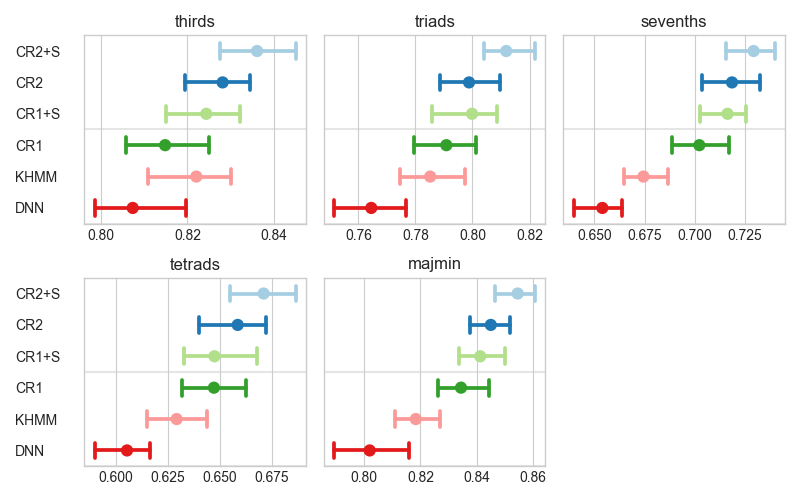

In [59]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(['thirds', 'triads', 'sevenths', 'tetrads', 'majmin'], 1):
    ax = plt.subplot(2,3,i)
    P(data=results_noinv[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(5.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(2.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 3 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

In [52]:
results.minor_axis

Index(['majmin', 'majmin_inv', 'mirex', 'root', 'sevenths', 'sevenths_inv',
       'tetrads', 'tetrads_inv', 'thirds', 'thirds_inv', 'triads',
       'triads_inv'],
      dtype='object')

<IPython.core.display.Javascript object>


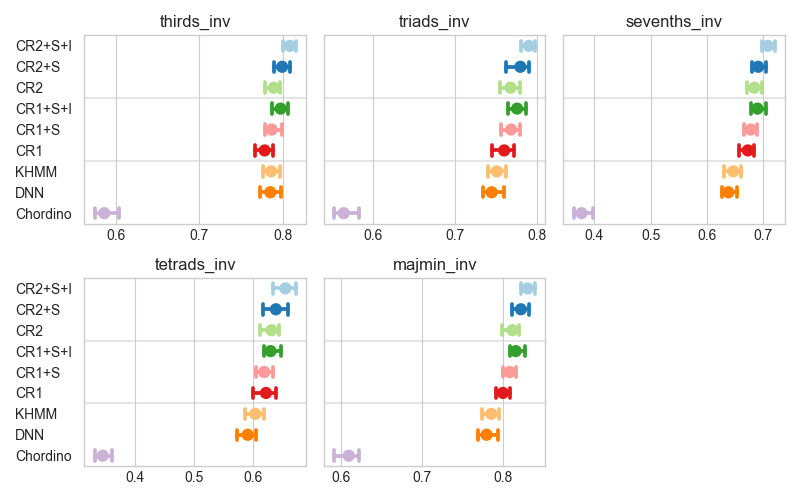

In [53]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(['thirds_inv', 'triads_inv', 'sevenths_inv', 'tetrads_inv', 'majmin_inv'], 1):
    ax = plt.subplot(2,3,i)
    P(data=results_inv[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(5.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(2.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 3 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

In [65]:
results.minor_xs('majmin_inv').describe()


,CR1,CR1+S,CR1+S+I,CR2,CR2+S,CR2+S+I,Chordino,DNN,KHMM
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,0.758832,0.765041,0.773243,0.767462,0.775648,0.786245,0.586817,0.745841,0.748714
std,0.167891,0.172757,0.170912,0.170105,0.170256,0.168140,0.195840,0.173350,0.171796
min,0.002583,0.000861,0.000861,0.007706,0.005617,0.005617,0.001651,0.010210,0.000000
25%,0.688936,0.695814,0.712635,0.699221,0.707193,0.729861,0.475520,0.660908,0.672328
50%,0.799385,0.807556,0.815103,0.811104,0.821471,0.829804,0.609788,0.779308,0.784970
75%,0.879344,0.886778,0.888629,0.890663,0.897507,0.903702,0.728385,0.874991,0.873863
max,0.994758,0.993823,0.993823,1.000000,0.999719,0.999719,0.990964,1.000000,0.984107
